# 05 - Emsembles

Emsemble models uses a divide-and-conquer approach, combining multiple models to get a better one.

The emseble models that will be analyzed are Random Forests and Gradient Boosting.

## Random Forests

Each classifier in the ensemble is a decision tree, trained over a resample with replacement of the original dataset and using a random selection of the variables to determine the best split.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
# import sklearn.metrics as metrics
# from sklearn.ensemble import RandomForestClassifier
from utils import modelAnalyzesFunctions as analyzes

In [3]:
data: pd.DataFrame = pd.read_csv('../datasets/covtype_data_preparation.csv', sep=',', decimal='.')
copy_data = data.copy()
y: np.ndarray = copy_data.pop('Cover_Type').values
X: np.ndarray = copy_data.values
labels = pd.unique(y)

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type-32,Soil_Type-33,Soil_Type-34,Soil_Type-35,Soil_Type-36,Soil_Type-37,Soil_Type-38,Soil_Type-39,Soil_Type-40,Cover_Type
0,0.546773,0.200000,0.454545,0.047960,0.272610,0.367290,0.937008,0.665354,0.161417,0.308518,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.637819,0.891667,0.090909,0.064424,0.223514,0.105381,0.803150,0.921260,0.665354,0.158929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.716858,0.163889,0.287879,0.125268,0.232558,0.593790,0.905512,0.771654,0.354331,0.500209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.549775,0.133333,0.106061,0.021475,0.228682,0.437544,0.877953,0.885827,0.543307,0.157814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.699850,0.519444,0.121212,0.336435,0.295866,0.360264,0.870079,0.968504,0.625984,0.191552,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

In [5]:
accuracy_rf, sensitivity_rf = analyzes.random_forest(X, y, rskf, average='micro')

print("Baseline accuracy: ", accuracy_rf)
print("Baseline sensitivity: ", sensitivity_rf)

Baseline accuracy:  0.8396505751990366
Baseline sensitivity:  0.8396505751990366


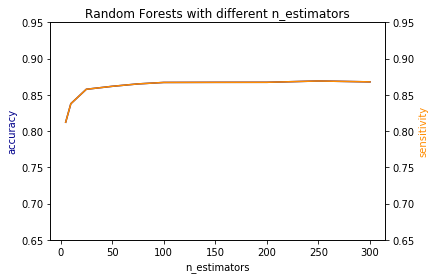

Max accuracy_rf_n_est
Accuracy: 0.8692422502673053
Sensitivity: 0.8692422502673053
n_estimators: 250

Max sensitivity
Accuracy:  0.8692422502673053
Sensitivity: 0.8692422502673053
n_estimators: 250


In [6]:
accuracy_rf_n_est, sensitivity_rf_n_est = analyzes.random_forest_analyzes(X, y, n_estimators, "n_estimators", rskf, average='micro')

print('Max accuracy_rf_n_est')
print('Accuracy:', max(accuracy_rf_n_est.values()))
print('Sensitivity:', sensitivity_rf_n_est[max(accuracy_rf_n_est, key=accuracy_rf_n_est.get)])
best_n_estimators = max(accuracy_rf_n_est, key=accuracy_rf_n_est.get)
print('n_estimators:', best_n_estimators)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_rf_n_est[max(sensitivity_rf_n_est, key=sensitivity_rf_n_est.get)])
print('Sensitivity:', max(sensitivity_rf_n_est.values()))
print('n_estimators:', max(sensitivity_rf_n_est, key=sensitivity_rf_n_est.get))

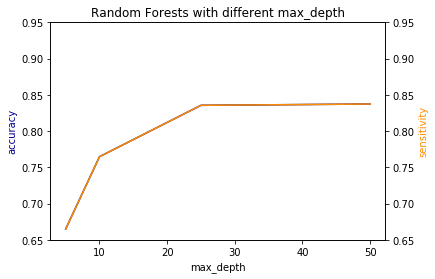

Max accuracy
Accuracy: 0.8374485774466041
Sensitivity: 0.8374485774466041
max_depth: 50

Max sensitivity
Accuracy:  0.8374485774466041
Sensitivity: 0.8374485774466041
max_depth: 50


In [7]:
accuracy_rf_max_d, sensitivity_rf_max_d = analyzes.random_forest_analyzes(X, y, max_depths, "max_depth", rskf, average='micro')

print('Max accuracy')
print('Accuracy:', max(accuracy_rf_max_d.values()))
print('Sensitivity:', sensitivity_rf_max_d[max(accuracy_rf_max_d, key=accuracy_rf_max_d.get)])
best_max_depth = max(accuracy_rf_max_d, key=accuracy_rf_max_d.get)
print('max_depth:', best_max_depth)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_rf_max_d[max(sensitivity_rf_max_d, key=sensitivity_rf_max_d.get)])
print('Sensitivity:', max(sensitivity_rf_max_d.values()))
print('max_depth:', max(sensitivity_rf_max_d, key=sensitivity_rf_max_d.get))

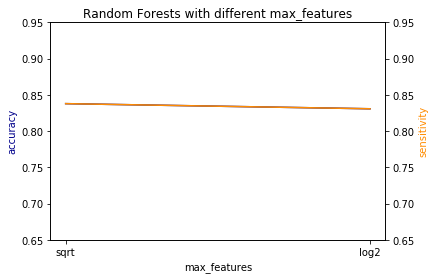

Max accuracy
Accuracy: 0.8379872297669922
Sensitivity: 0.8379872297669922
max_features: sqrt

Max sensitivity
Accuracy:  0.8379872297669922
Sensitivity: 0.8379872297669922
max_features: sqrt


In [8]:
accuracy_rf_max_f, sensitivity_rf_max_f = analyzes.random_forest_analyzes(X, y, max_features, "max_features", rskf, average='micro')

print('Max accuracy')
print('Accuracy:', max(accuracy_rf_max_f.values()))
print('Sensitivity:', sensitivity_rf_max_f[max(accuracy_rf_max_f, key=accuracy_rf_max_f.get)])
best_max_features = max(accuracy_rf_max_f, key=accuracy_rf_max_f.get)
print('max_features:', best_max_features)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_rf_max_f[max(sensitivity_rf_max_f, key=sensitivity_rf_max_f.get)])
print('Sensitivity:', max(sensitivity_rf_max_f.values()))
print('max_features:', max(sensitivity_rf_max_f, key=sensitivity_rf_max_f.get))

In [9]:
accuracy_rf_b, sensitivity_rf_b = analyzes.random_forest(X, y, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features, average='micro')

print("Best accuracy: ", accuracy_rf_b)
print("Best sensitivity: ", sensitivity_rf_b)

Best accuracy:  0.8686011418499611
Best sensitivity:  0.8686011418499611


We can see that, after a certain number of estimators, the accuracy stabilizes, the same happens with max_depth. So we could use `n_estimators = 50` and `max_depth = 25` to get a good result faster than using `n_estimators = 300`.

## Gradient Boosting

Another model from the emsemble family is the Gradient Boosting. The main difference between it and the random forest is that this one is a boosting algorithm, which means that there are different weights for different models to try to classify better the dataset.

Note: since the classification is not binary in this case, it was used a global metric (`average='micro'`) based on true positives and true negatives, that's why the accuracy and the sensitivity are the same.

In [10]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

In [11]:
accuracy_gb, sensitivity_gb = analyzes.gradient_boosting(X, y, rskf, average='micro')

print('Accuracy:', accuracy_gb)
print('Sensitivity:', sensitivity_gb)

Accuracy: 0.7960014739936317
Sensitivity: 0.7960014739936317


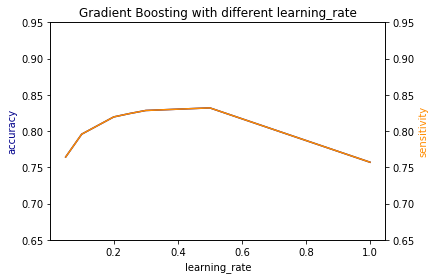

Max accuracy
Accuracy: 0.832128261695909
Sensitivity: 0.832128261695909
learning_rate: 0.5

Max sensitivity
Accuracy:  0.832128261695909
Sensitivity: 0.832128261695909
learning_rate: 0.5


In [12]:
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.5, 1]
n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [3, 5, 10, 25, 50]
max_features = ['sqrt', 'log2']

accuracy_gb_lr, sensitivity_gb_lr = analyzes.gradient_boosting_analyzes(X, y, learning_rate, 'learning_rate', rskf, average='micro')

print('Max accuracy')
print('Accuracy:', max(accuracy_gb_lr.values()))
print('Sensitivity:', sensitivity_gb_lr[max(accuracy_gb_lr, key=accuracy_gb_lr.get)])
best_learning_rate = max(accuracy_gb_lr, key=accuracy_gb_lr.get)
print('learning_rate:', max(accuracy_gb_lr, key=accuracy_gb_lr.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_gb_lr[max(sensitivity_gb_lr, key=sensitivity_gb_lr.get)])
print('Sensitivity:', max(sensitivity_gb_lr.values()))
print('learning_rate:', max(sensitivity_gb_lr, key=sensitivity_gb_lr.get))

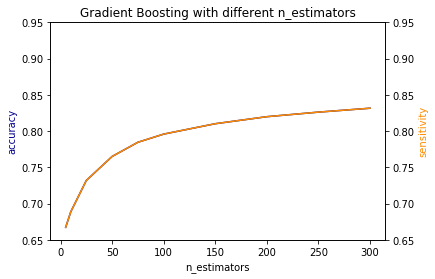

Max accuracy
Accuracy: 0.8316769092451168
Sensitivity: 0.8316769092451168
n_estimators: 300

Max sensitivity
Accuracy:  0.8316769092451168
Sensitivity: 0.8316769092451168
n_estimators: 300


In [13]:
accuracy_gb_n_est, sensitivity_gb_n_est = analyzes.gradient_boosting_analyzes(X, y, n_estimators, 'n_estimators', rskf, average='micro')

print('Max accuracy')
print('Accuracy:', max(accuracy_gb_n_est.values()))
print('Sensitivity:', sensitivity_gb_n_est[max(accuracy_gb_n_est, key=accuracy_gb_n_est.get)])
best_n_estimators = max(accuracy_gb_n_est, key=accuracy_gb_n_est.get)
print('n_estimators:', max(accuracy_gb_n_est, key=accuracy_gb_n_est.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_gb_n_est[max(sensitivity_gb_n_est, key=sensitivity_gb_n_est.get)])
print('Sensitivity:', max(sensitivity_gb_n_est.values()))
print('n_estimators:', max(sensitivity_gb_n_est, key=sensitivity_gb_n_est.get))

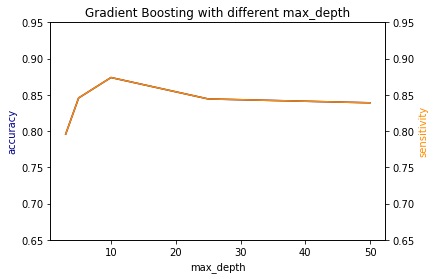

Max accuracy
Accuracy: 0.8740252524976957
Sensitivity: 0.8740252524976957
max_depth: 10

Max sensitivity
Accuracy:  0.8740252524976957
Sensitivity: 0.8740252524976957
max_depth: 10


In [14]:
accuracy_gb_max_d, sensitivity_gb_max_d = analyzes.gradient_boosting_analyzes(X, y, max_depths, 'max_depth', rskf, average='micro')

print('Max accuracy')
print('Accuracy:', max(accuracy_gb_max_d.values()))
print('Sensitivity:', sensitivity_gb_max_d[max(accuracy_gb_max_d, key=accuracy_gb_max_d.get)])
best_max_depth = max(accuracy_gb_max_d, key=accuracy_gb_max_d.get)
print('max_depth:', max(accuracy_gb_max_d, key=accuracy_gb_max_d.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_gb_max_d[max(sensitivity_gb_max_d, key=sensitivity_gb_max_d.get)])
print('Sensitivity:', max(sensitivity_gb_max_d.values()))
print('max_depth:', max(sensitivity_gb_max_d, key=sensitivity_gb_max_d.get))

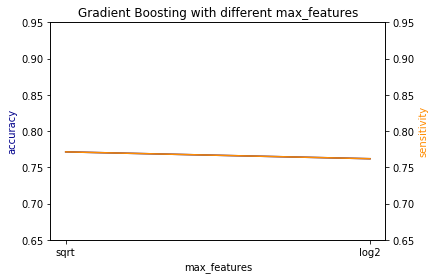

Max accuracy
Accuracy: 0.7714546755041618
Sensitivity: 0.7714546755041618
max_features: sqrt

Max sensitivity
Accuracy:  0.7714546755041618
Sensitivity: 0.7714546755041618
max_features: sqrt


In [15]:
accuracy_gb_max_f, sensitivity_gb_max_f = analyzes.gradient_boosting_analyzes(X, y, max_features, 'max_features', rskf, average='micro')

print('Max accuracy')
print('Accuracy:', max(accuracy_gb_max_f.values()))
print('Sensitivity:', sensitivity_gb_max_f[max(accuracy_gb_max_f, key=accuracy_gb_max_f.get)])
best_max_features = max(accuracy_gb_max_f, key=accuracy_gb_max_f.get)
print('max_features:', max(accuracy_gb_max_f, key=accuracy_gb_max_f.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy_gb_max_f[max(sensitivity_gb_max_f, key=sensitivity_gb_max_f.get)])
print('Sensitivity:', max(sensitivity_gb_max_f.values()))
print('max_features:', max(sensitivity_gb_max_f, key=sensitivity_gb_max_f.get))

In [16]:
accuracy_gb_b, sensitivity_gb_b = analyzes.gradient_boosting(X, y, rskf, learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features, average='micro')

print("Best accuracy: ", accuracy_gb_b)
print("Best sensitivity: ", sensitivity_gb_b)

Best accuracy:  0.8599840687842139
Best sensitivity:  0.8599840687842139
